In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.price.describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

In [4]:
df.shape

(13320, 9)

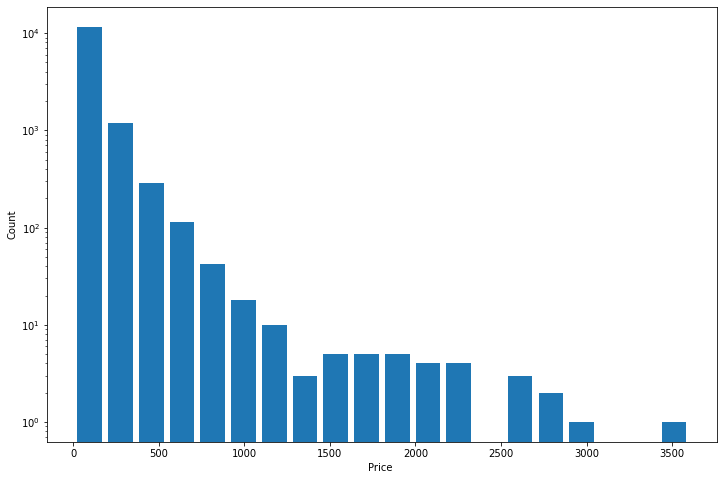

In [5]:
plt.hist(df.price, bins=20, rwidth=0.8)
plt.xlabel('Price ')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [6]:
lower_limit, upper_limit = df.price.quantile([0.001, 0.999])
lower_limit, upper_limit

(11.159500000000001, 2000.0)

In [7]:
outliers = df[(df.price > upper_limit) | (df.price < lower_limit)]
outliers.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
408,Super built-up Area,19-Jan,Rajaji Nagar,7 BHK,NaN,12000,6.0,3.0,2200.00
10526,Super built-up Area,Ready To Move,Yelahanka New Town,1 BHK,KHatsFl,284,1.0,1.0,8.00
8594,Built-up Area,Ready To Move,Chandapura,1 BHK,NaN,450,1.0,1.0,9.00
6421,Plot Area,18-Sep,Bommenahalli,4 Bedroom,Prood G,2940,3.0,2.0,2250.00
1471,Built-up Area,18-Mar,Kengeri,1 BHK,NaN,340,1.0,1.0,10.00
4113,Super built-up Area,18-Jan,BTM Layout,3 BHK,NaN,167Sq. Meter,3.0,2.0,10.00
11763,Plot Area,Ready To Move,Sadashiva Nagar,5 Bedroom,NaN,9600,7.0,2.0,2736.00
2437,Built-up Area,Ready To Move,Attibele,1 BHK,Jae 1hu,395,1.0,1.0,10.25
5410,Super built-up Area,Ready To Move,Attibele,1 BHK,Jae 1hu,400,1.0,1.0,10.00
13197,Plot Area,Ready To Move,Ramakrishnappa Layout,4 Bedroom,NaN,9200,4.0,NaN,2600.00


In [8]:
df2 = df[(df.price<upper_limit) & (df.price>lower_limit)]
df2.shape

(13291, 9)

In [9]:
df.shape

(13320, 9)

In [10]:
df.shape[0] - df2.shape[0]

29

In [11]:
max_limit = df2.price.mean() + 4*df2.price.std()
min_limit = df2.price.mean() - 4*df2.price.std()
max_limit, min_limit

(611.7477497493892, -391.7270282084969)

In [12]:
df2[(df2.price>max_limit) | (df2.price < min_limit)].sample(10)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7155,Super built-up Area,Ready To Move,Whitefield,4 BHK,Toindls,5924,4.0,3.0,625.0
2620,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,Prowshi,11338,9.0,1.0,1000.0
8398,Super built-up Area,Ready To Move,Bannerghatta Road,5 BHK,NaN,2500,4.0,NaN,1400.0
12987,Plot Area,Ready To Move,Dodsworth Layout,6 Bedroom,NaN,30400,4.0,2.0,1824.0
159,Plot Area,Ready To Move,Mahalakshmi Layout,4 Bedroom,NaN,3750,4.0,0.0,760.0
11309,Super built-up Area,19-Dec,Kodihalli,4 BHK,Priesla,3626,5.0,3.0,788.0
9458,Plot Area,Ready To Move,HAL 2nd Stage,4 Bedroom,NaN,2280,4.0,2.0,615.0
10485,Super built-up Area,18-Jul,Rajaji Nagar,5 BHK,Phaku K,7514,7.0,NaN,1500.0
8610,Super built-up Area,Ready To Move,Cunningham Road,3 BHK,Lelia M,4170,3.0,2.0,800.0
5711,Plot Area,18-Apr,2nd Block Jayanagar,4 Bedroom,NaN,4920,5.0,2.0,1150.0


In [13]:
df3 = df2[(df2.price>min_limit) & (df2.price < max_limit)]
df3.shape

(13144, 9)

In [14]:
df2.shape[0]-df3.shape[0]

147

In [22]:
df2['zscore'] = (df2.price-df2.price.mean())/df2.price.std()
df2.sample(10)

<ipython-input-22-dfc18d844680>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price-df2.price.mean())/df2.price.std()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
12570,Super built-up Area,Ready To Move,Bommasandra Industrial Area,2 BHK,NaN,7000,2.0,1.0,135.00,0.199225
7962,Built-up Area,Ready To Move,Sarjapur,4 Bedroom,Prldsum,3508 - 4201,6.0,0.0,385.50,2.196286
4377,Built-up Area,Ready To Move,Chandapura,1 BHK,NaN,620,1.0,1.0,27.00,-0.661783
12249,Super built-up Area,Ready To Move,Hennur Road,3 BHK,SaireSa,1891,3.0,1.0,110.00,-0.000083
10935,Carpet Area,Ready To Move,Bhoopsandra,3 BHK,E onsg,2050,3.0,2.0,135.00,0.199225
9684,Super built-up Area,Ready To Move,Talaghattapura,3 BHK,NaN,1575,3.0,2.0,80.00,-0.239252
153,Super built-up Area,Ready To Move,Sanjeevini Nagar,3 BHK,Betatsi,2795,4.0,NaN,235.00,0.996455
5653,Super built-up Area,Ready To Move,Jigani,3 BHK,DLhtsen,1221,3.0,3.0,52.00,-0.462476
7493,Super built-up Area,18-Dec,Whitefield,3 BHK,Prtates,2134,4.0,2.0,118.00,0.063696
11497,Plot Area,18-Aug,ITPL,3 Bedroom,NaN,1500,3.0,1.0,61.52,-0.386580


In [23]:
outliers_z = df2[(df2.zscore < -4)| (df2.zscore > 4)]
outliers_z.shape

(147, 10)

In [24]:
outliers_z.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
1873,Plot Area,Ready To Move,Kasavanhalli,5 Bedroom,NaN,5800,7.0,NaN,1200.0,8.689722
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,NaN,2400,40.0,0.0,660.0,4.384681
7727,Super built-up Area,Ready To Move,Cubbon Road,4 BHK,NaN,5422,6.0,NaN,1900.0,14.270331
3673,Plot Area,18-Apr,KR Layout,4 Bedroom,NaN,4800,4.0,0.0,700.0,4.703573
12449,Plot Area,Ready To Move,Indira Nagar,4 Bedroom,NaN,2400,4.0,1.0,700.0,4.703573
9195,Super built-up Area,18-Mar,Whitefield,3 BHK,Asarqz,1496,2.0,1.0,718.0,4.847075
6034,Plot Area,Ready To Move,1A Block Koramangala,4 Bedroom,NaN,2360,4.0,1.0,650.0,4.304958
9217,Plot Area,Ready To Move,Seegehalli,4 Bedroom,Stndeil,4700,5.0,3.0,800.0,5.500803
3425,Super built-up Area,Ready To Move,Ramakrishnappa Layout,5 BHK,PeBayle,6200,5.0,NaN,720.0,4.863019
4590,Plot Area,Ready To Move,Marathahalli,4 Bedroom,NaN,4000,4.0,1.0,650.0,4.304958


In [25]:
df4 = df2[(df2.zscore > -4) & (df2.zscore < 4)]
df4.shape

(13144, 10)

In [26]:
df2.shape[0] - df4.shape[0]

147